<a href="https://colab.research.google.com/github/ASREETHASREEJA5/Deep-Learning/blob/main/data_augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='Desktop', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('/tmp/.keras/datasets/flower_photos')

In [7]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [8]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [9]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [10]:
x = np.array(x)
y = np.array(y)

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [12]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [13]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 19ms/step - loss: 1.3453 - accuracy: 0.4211
Epoch 2/30
86/86 [==============================] - 2s 19ms/step - loss: 1.0280 - accuracy: 0.5839
Epoch 3/30
86/86 [==============================] - 2s 19ms/step - loss: 0.8701 - accuracy: 0.6686
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.6976 - accuracy: 0.7449
Epoch 5/30
86/86 [==============================] - 2s 22ms/step - loss: 0.4921 - accuracy: 0.8209
Epoch 6/30
86/86 [==============================] - 2s 20ms/step - loss: 0.3040 - accuracy: 0.8983
Epoch 7/30
86/86 [==============================] - 2s 19ms/step - loss: 0.1666 - accuracy: 0.9484
Epoch 8/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0833 - accuracy: 0.9749
Epoch 9/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0483 - accuracy: 0.9884
Epoch 10/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0416 - accuracy: 0.9902
Epoch 11/

In [14]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 21ms/step - loss: 2.2327 - accuracy: 0.6373


[2.232712984085083, 0.6372548937797546]

In [15]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 16ms/step


array([[  2.0336192,  11.84303  ,  -2.6582582,  -3.3275414,   0.779545 ],
       [ 12.363618 ,   1.561373 ,  -8.021454 ,  -8.826611 ,  20.102564 ],
       [  1.9757485,   5.318313 ,   6.806718 , -18.886967 ,   3.6224854],
       ...,
       [ -7.747909 ,  -1.745348 ,   4.192188 ,   4.492716 ,   4.386841 ],
       [ 10.628411 ,   6.935094 ,  -6.302993 ,  -8.456908 ,   6.6330795],
       [ -5.6228123,   0.8205061,  -2.7150364,  10.450145 ,   3.8220303]],
      dtype=float32)

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

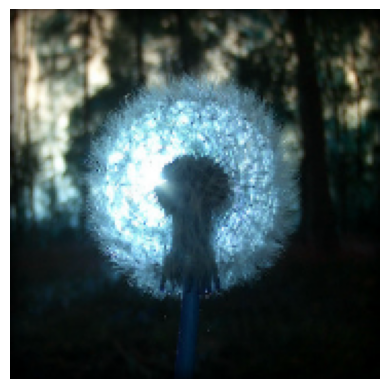

In [17]:
plt.axis('off')
plt.imshow(X_train_scaled[0])

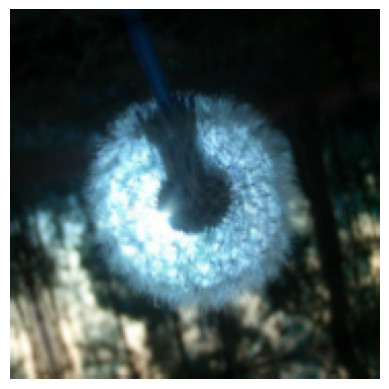

In [18]:
plt.axis('off')
plt.imshow(data_augmentation(X_train_scaled)[0].numpy())

In [19]:
num_classes = 5

aug_model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

aug_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

aug_model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 31ms/step - loss: 1.3040 - accuracy: 0.4317
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0447 - accuracy: 0.5745
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9395 - accuracy: 0.6283
Epoch 4/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8811 - accuracy: 0.6541
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8303 - accuracy: 0.6719
Epoch 6/30
86/86 [==============================] - 3s 31ms/step - loss: 0.7757 - accuracy: 0.6955
Epoch 7/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7404 - accuracy: 0.7064
Epoch 8/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7221 - accuracy: 0.7169
Epoch 9/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6893 - accuracy: 0.7297
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6731 - accuracy: 0.7358
Epoch 11/

In [20]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 12ms/step - loss: 2.2327 - accuracy: 0.6373


[2.232712984085083, 0.6372548937797546]